In [12]:
import matplotlib.pyplot as plt
from Utils import prim_dens
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def visualize_precision_and_recall(precision_baseline, recall_baseline, precision1, recall1, first_label, second_label):

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(recall_baseline, precision_baseline, c='blue', marker='o', label=first_label)
    
    plt.scatter(recall1, precision1, c='red', marker='o', label=second_label)

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt


In [13]:
def get_list_all_precisions_recalls_boxes(x, y):
    
    prim_alg = prim_dens.PRIMdens(x.values, y, alpha=0.1)
    prim_alg.fit()
    return prim_alg.get_precisions(), prim_alg.get_recalls(), prim_alg.get_boxes()
 

In [14]:
def define_y_x_all_data(data_name, stratify_feature, drop_feature):
    data = []
    if (data_name) == 'Bryant':
        data = pd.read_csv(
            '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Bryant et al 2010.csv')

    else:
        if (data_name) == 'Rozenberg':
            data = pd.read_csv(
                '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Rozenberg et al 2014.csv')
    
    scaler = MinMaxScaler()
    data1 = data
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data, index = data1.index, columns=data1.columns)
    
    y = data[stratify_feature]
    x = pd.DataFrame(data.drop(columns=drop_feature))
    
    return x, y

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

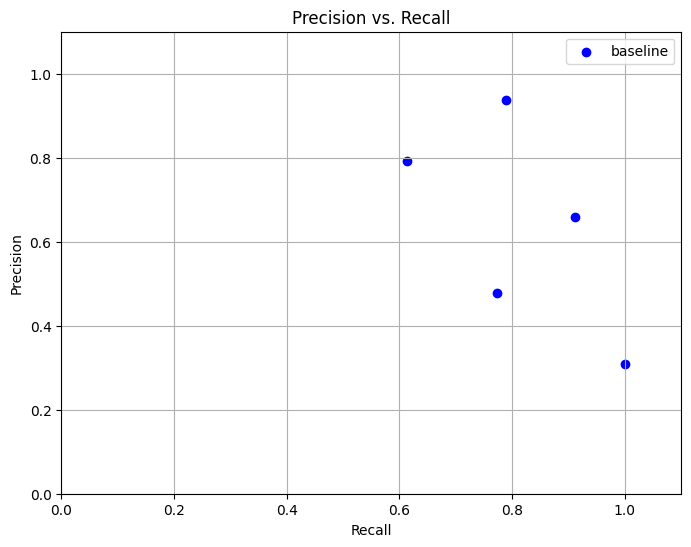

In [15]:
#baseline normal dataset, not modified
x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

prec_baseline, rec_baseline, boxes1 = get_list_all_precisions_recalls_boxes(x, y)

visualize_precision_and_recall(prec_baseline, rec_baseline, [], [], 'baseline', '')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

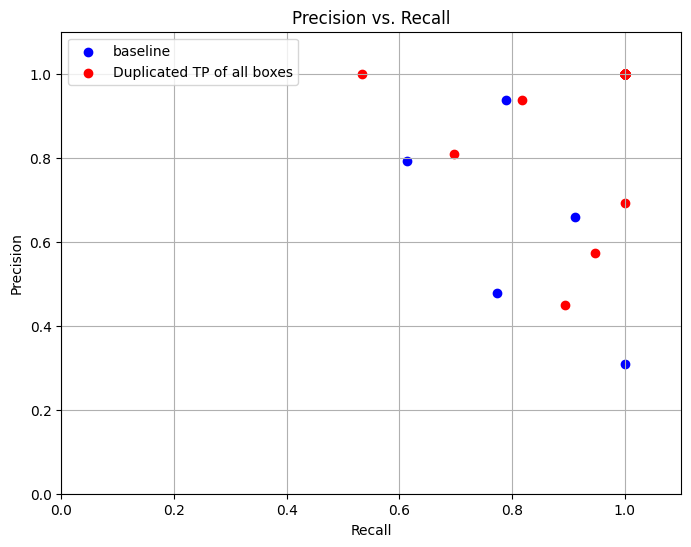

In [16]:
#duplicate 1 in each box from test data

x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

labels2 = y.copy()
data2 = x.copy()

#iterate over limit entries which is list of dataframes
for i in range(len(boxes1)):
        
    box = boxes1[i]
    box = pd.DataFrame(box)
    # Iterate over each row of x
    for index, row in x.iterrows():
        is_within_limits = True
        a = 0
        # Check if entry lies within the specified limits
        for column, value in row.iteritems():
            is_within_limits = (box.iloc[0, a] <= value <= box.iloc[1, a]) & is_within_limits
            a = a + 1
        if is_within_limits:
            data2.loc[len(data2)] = row
            labels2.loc[len(labels2)] = y[index]

prec_DupOnesAllBoxes, rec_DupOnesAllBoxes, boxes = get_list_all_precisions_recalls_boxes(data2, labels2)

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnesAllBoxes, rec_DupOnesAllBoxes, 'baseline', 'Duplicated TP of all boxes')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

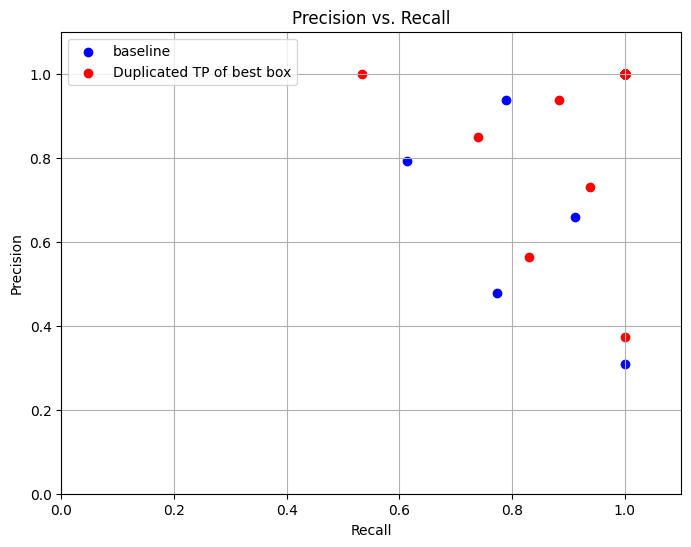

In [17]:
#duplicate 1 in best box

x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

labels3 = y.copy()
data3 = x.copy()
box = boxes1[len(boxes1) - 1]
box = pd.DataFrame(box)

# Iterate over each row of temp_data
for index, row in x.iterrows():
    is_within_limits = True
    # Check if entry lies within the specified limits
    for a, (column, value) in enumerate(row.iteritems()):
        is_within_limits = (box.iloc[0, a] <= value <= box.iloc[1, a]) & is_within_limits
    if is_within_limits:
        data3.loc[len(data3)] = row
        labels3.loc[len(labels3)] = y[index]

prec_DupOnesBestBox, rec_DupOnesBestBox, boxes = get_list_all_precisions_recalls_boxes(data3, labels3)

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnesBestBox, rec_DupOnesBestBox, 'baseline', 'Duplicated TP of best box')

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

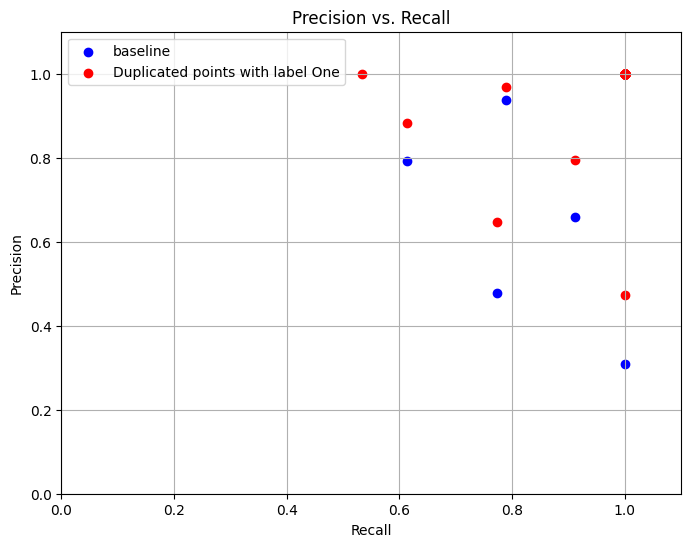

In [18]:
#duplicate all pints where label is 1
x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

labels4 = y.copy()
data4 = x.copy()

# Iterate over each row of temp_data
for index, row in x.iterrows():
    if y[index] == 1:
        data4.loc[len(data4)] = row
        labels4.loc[len(labels4)] = y[index]

prec_DupOnes, rec_DupOnes, boxes = get_list_all_precisions_recalls_boxes(data4, labels4)
    
visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnes, rec_DupOnes, 'baseline', 'Duplicated points with label One')